<a href="https://colab.research.google.com/github/gerges87/Real-Time-sentimet-Analyzer-And-Reporter/blob/main/bank%20car%20directions(clustring).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
source_path = '/content/drive/My Drive/Dataset/atms_dataset.csv'
destination_path = '/content/atms_dataset.csv'
shutil.copy(source_path, destination_path)

'/content/atms_dataset.csv'

In [ ]:

df = pd.read_csv('/content/atms_dataset.csv',index_col='id')

print(df.head())

                                                                                   name  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98                                     Abu Al Matamir   
ccc384e5-1685-4e11-8714-0ebb44713258                                     Abu Al Matamir   
dd5110e3-dec0-478b-8749-f7f63515d1b3                                     Abu Al Matamir   
f4cce849-681b-4404-9feb-e54bb1cfe134                                     Abu Al Matamir   
dc9b6f97-4044-4e0d-970c-2404b5f847dc  Higher Institute of Administrative Scie. Janaklis   

                                                                                address  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98  Alexandria St. in front of Abo Almatamir Youth...   
ccc384e5-1685-4e11-8714-0ebb44713258    Mohamed Metwally Alshaarawy St. - Abo Almatamir  

In [ ]:
print(df.head())

                                                                                   name  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98                                     Abu Al Matamir   
ccc384e5-1685-4e11-8714-0ebb44713258                                     Abu Al Matamir   
dd5110e3-dec0-478b-8749-f7f63515d1b3                                     Abu Al Matamir   
f4cce849-681b-4404-9feb-e54bb1cfe134                                     Abu Al Matamir   
dc9b6f97-4044-4e0d-970c-2404b5f847dc  Higher Institute of Administrative Scie. Janaklis   

                                                                                address  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98  Alexandria St. in front of Abo Almatamir Youth...   
ccc384e5-1685-4e11-8714-0ebb44713258    Mohamed Metwally Alshaarawy St. - Abo Almatamir  

In [ ]:
df['services'].unique()

array(['Withdrawal', 'Withdrawal -Deposit – Forex', 'سحب فقط\n',
       'Cash Dispenser only\n', 'withdrawal,deposit',
       'withdrawal,deposit ', 'withdrawal only',
       'Withdrawal -Deposit - Forex', 'سحب - إيداع - تغيير عملة\n',
       'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU\n',
       'deposit,withdraw and exchange', 'Full Function\n',
       'withdrawal, deposit', 'Withdrawal, Deposit and Exchange',
       'withdrawal ,deposit', 'Withdraws -Deposits- Forex', 'withdrawal',
       'Withdrawal Only', 'withdraw only',
       'Withdrawal, Deposit, Exchange',
       'withdraw, deposit and exchange\t\t\n', 'سحب فقط', nan,
       'full function', 'Withdrawal-Deposit-Exchange',
       'Withdraw - Deposit - Exchange', 'withdrawal , deposit',
       'with drawal , deposit', 'withdrawal deposit',
       'withdrawal . deposit', 'Withdraw - Deposit - Exchange Currency',
       'withdrawal deposit forex', 'withdrawal,forex,deposit',
       'withdrawal forex deposit', 'withdrawal , 

In [ ]:
data={'Withdrawal':1, 'Withdrawal -Deposit – Forex':3, 'سحب فقط\n':1,
       'Cash Dispenser only\n':1, 'withdrawal,deposit':2,
       'withdrawal,deposit ':2, 'withdrawal only':1,
       'Withdrawal -Deposit - Forex':3, 'سحب - إيداع - تغيير عملة\n':3,
       'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU\n':3,
       'deposit,withdraw and exchange':3, 'Full Function\n':3,
       'withdrawal, deposit':2, 'Withdrawal, Deposit and Exchange':3,
       'withdrawal ,deposit':2, 'Withdraws -Deposits- Forex':3, 'withdrawal':1,
       'Withdrawal Only':1, 'withdraw only':1,
       'Withdrawal, Deposit, Exchange':3,
       'withdraw, deposit and exchange\t\t\n':3, 'سحب فقط':1,
       'full function':3, 'Withdrawal-Deposit-Exchange':3,
       'Withdraw - Deposit - Exchange':3, 'withdrawal , deposit':2,
       'with drawal , deposit':2, 'withdrawal deposit':2,
       'withdrawal . deposit':2, 'Withdraw - Deposit - Exchange Currency':3,
       'withdrawal deposit forex':3, 'withdrawal,forex,deposit':3,
       'withdrawal forex deposit':3, 'withdrawal , forex , deposit':3,
       'cash withdrawal':1, 'Exchange':3, 'سحب':1, 'withdrawal,deposit,forex':3,
       'GBRU سحب - إيداع - تغيير عملة - صرف من الإيداعات\n':3,
       'withdrawal , forex , deposits':3, 'سحب وايداع وتغيير عملة':3,
       'withdrawal,forex deposit':3, 'withdrawal, deposit and exchange\n':3,
       'Withdrawal - deposit - currency exchange':3,
       'Withdrawal and Deposit':2, 'with drawal deposit forex':2, '8 to 5':0,
       'Withdrawal only':1, '8am-5pm':0, 'Full Function\n\n':3,
       'Withdrawal, Deposit, Exchange\n\n':3,
       'Withdrawal, Deposit, Exchange\n':3, '8 am to 5 pm':0,
       'withdrawal-deposit-currency exchange':3,
       'Withrdrawal, Deposit, Foriegn currency exchange':3,
       'Withdrawl only':1, 'withdrawl only':1, 'withdrawal and deposit':2,
       'Withdrawal, deposit and exchange':3, 'withdrawal.deposit':2,
       'Withdraw - Deposit - Currency Exchange':3, 'withdraw':1,
       'Withdraw - Deposit - Change currency':3, '8:300 - 3:00\n':0,
       'forex,withdrawal,deposit':3, 'deposit':2,
       'withdrawal ,forex ,deposit':3, 'withdrawal.deposit,forex':3,
       'withdrawal , deposit, forex':3, 'forex withdrawal deposit':3,
       'forex,deposit,withdrawal':3, 'WIth drawal , deposit':2,
       'forex deposit withdrawal':3,
       'from 8.30 AM to 3 PM\n\nWithdrawal - deposit - currency exchange':3,
       'Cash Dispenser only':1, 'Withdraw':1, 'Full Function':3,
       'Cash Dispenser only\n\n':1, ' Withdrawal, Deposit, Exchange':3,
       'سحب - إيداع - تغيير عملة - صرف من الإيداعات GBRU+ Barcode\n':3,
       'Withdrawal - Deposit - Change Currency':3,
       'Withdrawal - Exchange - Deposit':3, 'deposit,withdrawal,forex':3,
       'Withdraw - Deposit - Change Currency':3,
       '8:30 AM - 3:00 PM\n\nWithdrawal -Deposit - Forex':3,
       'with drawal deposit':2,
       'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n':3,
       'cash withdraw, deposit and exchange\t\n':3,
       'cash withdraw, deposit and exchange\t\n\t\n':3,
       'cash withdraw, deposit and exchange\t\t\t\t\n':3,
       'GBRU سحب - إيداع - تغيير عملة - صرف من الإيداعات':3,
       'deposit , withdrawal':2, 'deposit,withdrawal':2,
       '8:30 AM - 3:00PM\n\nWithdrawal, Deposit, Exchange':3,
       'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\n\t\t\t\t\n':3,
       'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\t':3,
       'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t\n':3,
       'deposit, withdraw and exchange\t\t\t\t\n\t\t\t\t\n':3,
       'cash withdraw, deposit and exchange\t\t\t\t\n\t\t\t':3,
       'withdrawal,depsoit':2, 'cash withdraw, deposit and exchange':3,
       'ATM CENTER\n':0, 'with drawal,cash ,forex':3, 'سحب وايداع':2,
       'deposits,withdrawal':2, 'withdrawal, deposit, forex':3,
       '25.142973,34.840527\n\n':0, 'depositand withdrawal':0,
       'deposit withdrawal':2, 'with drawal':1,
       'withdrawal, deposit and exchange':3, 'deposit and withdrawal':2}

In [ ]:

# Sample DataFrame (replace with your actual DataFrame)
#

df['services'] = df['services'].map(data).fillna(0).astype(int)

# Remove rows where 'services' is 0
df = df[df['services'] != 0]

print(df)

                                                                                   name  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98                                     Abu Al Matamir   
ccc384e5-1685-4e11-8714-0ebb44713258                                     Abu Al Matamir   
dd5110e3-dec0-478b-8749-f7f63515d1b3                                     Abu Al Matamir   
f4cce849-681b-4404-9feb-e54bb1cfe134                                     Abu Al Matamir   
dc9b6f97-4044-4e0d-970c-2404b5f847dc  Higher Institute of Administrative Scie. Janaklis   
...                                                                                 ...   
47ea526b-171f-496a-b8fd-619f30fa6016                 Suez Canal Authority Water Company   
d10bfbc6-de95-4527-b38e-142262db2b82  Canal Company for Electricity Distribution - Suez   
837c6752-29d3-43c2-8738-04f43b1516f8                               Fawry Company - Suez   

In [ ]:

reverse_data = {
    1: 'Withdrawal',
    2: 'deposit,withdrawal',
    3: 'Withdrawal -Deposit – Forex'
}

df['services'] = df['services'].map(reverse_data)

print(df)

                                                                                   name  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98                                     Abu Al Matamir   
ccc384e5-1685-4e11-8714-0ebb44713258                                     Abu Al Matamir   
dd5110e3-dec0-478b-8749-f7f63515d1b3                                     Abu Al Matamir   
f4cce849-681b-4404-9feb-e54bb1cfe134                                     Abu Al Matamir   
dc9b6f97-4044-4e0d-970c-2404b5f847dc  Higher Institute of Administrative Scie. Janaklis   
...                                                                                 ...   
47ea526b-171f-496a-b8fd-619f30fa6016                 Suez Canal Authority Water Company   
d10bfbc6-de95-4527-b38e-142262db2b82  Canal Company for Electricity Distribution - Suez   
837c6752-29d3-43c2-8738-04f43b1516f8                               Fawry Company - Suez   

In [ ]:
df['services'].unique()

array(['Withdrawal', 'Withdrawal -Deposit – Forex', 'deposit,withdrawal'],
      dtype=object)

In [ ]:
print(df.head())

                                                                                   name  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98                                     Abu Al Matamir   
ccc384e5-1685-4e11-8714-0ebb44713258                                     Abu Al Matamir   
dd5110e3-dec0-478b-8749-f7f63515d1b3                                     Abu Al Matamir   
f4cce849-681b-4404-9feb-e54bb1cfe134                                     Abu Al Matamir   
dc9b6f97-4044-4e0d-970c-2404b5f847dc  Higher Institute of Administrative Scie. Janaklis   

                                                                                address  \
id                                                                                        
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98  Alexandria St. in front of Abo Almatamir Youth...   
ccc384e5-1685-4e11-8714-0ebb44713258    Mohamed Metwally Alshaarawy St. - Abo Almatamir  

In [ ]:
df

,name,address,governate,area,lat,lng,services
id,,,,,,,
a2ecf0ba-d4c5-46ab-b013-1090b84d6d98,Abu Al Matamir,Alexandria St. in front of Abo Almatamir Youth...,Al-Behera,Abu Al Matamir,30.912211,30.170589,Withdrawal
ccc384e5-1685-4e11-8714-0ebb44713258,Abu Al Matamir,Mohamed Metwally Alshaarawy St. - Abo Almatamir,Al-Behera,Abu Al Matamir,30.910789,30.177019,Withdrawal -Deposit – Forex
dd5110e3-dec0-478b-8749-f7f63515d1b3,Abu Al Matamir,The Village of Ten Thousand - Abu Almatamir,Al-Behera,Abu Al Matamir,30.814059,29.988302,Withdrawal -Deposit – Forex
f4cce849-681b-4404-9feb-e54bb1cfe134,Abu Al Matamir,Abo Almatamir - Beheira,Al-Behera,Abu Al Matamir,30.915840,30.176447,Withdrawal
dc9b6f97-4044-4e0d-970c-2404b5f847dc,Higher Institute of Administrative Scie. Janaklis,Abo Almatamir - Albuhiera,Al-Behera,Abu Al Matamir,30.860114,30.154931,Withdrawal
...,...,...,...,...,...,...,...
47ea526b-171f-496a-b8fd-619f30fa6016,Suez Canal Authority Water Company,Suez Canal Authority Water Company,Suez,Suez,29.967446,32.550833,Withdrawal -Deposit – Forex
d10bfbc6-de95-4527-b38e-142262db2b82,Canal Company for Electricity Distribution - Suez,AlGeish St. Suez District Suez in front of Oma...,Suez,Suez,29.967901,32.553257,Withdrawal
837c6752-29d3-43c2-8738-04f43b1516f8,Fawry Company - Suez,Two commercial stores numbers (12) located on ...,Suez,Suez,29.975812,32.546986,Withdrawal


In [ ]:


fig = px.scatter_mapbox(df, lat="lat", lon="lng", hover_name="name", hover_data=["address", "governate", "area", "services"],
                        color="services", zoom=6, height=600, width=800)  # Adjust zoom as needed
fig.update_layout(mapbox_style="open-street-map") # Or another map style
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

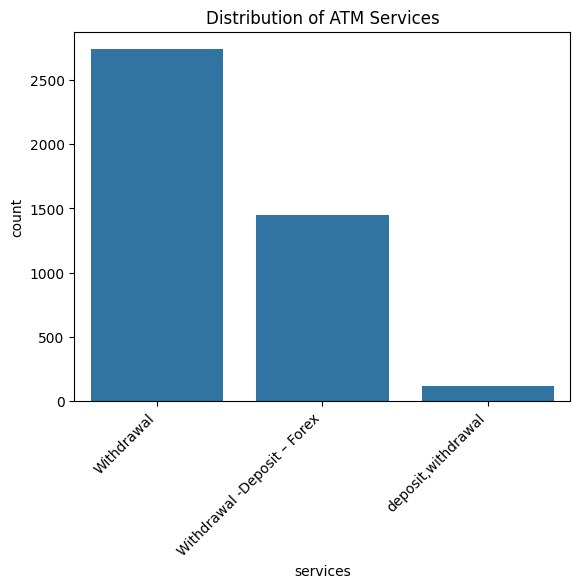

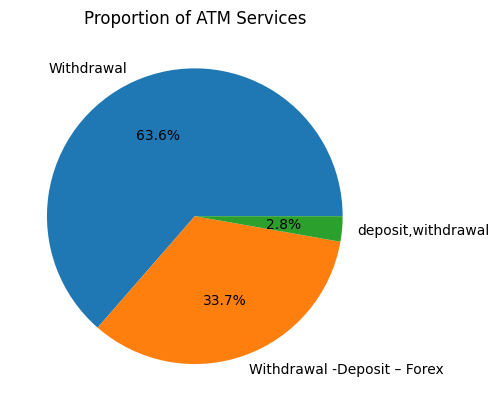

In [ ]:


sns.countplot(x='services', data=df)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
plt.title('Distribution of ATM Services')
plt.show()

# Or a pie chart:
df['services'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of ATM Services')
plt.ylabel('') # Hide the y-axis label
plt.show()

In [ ]:

features = ['lat', 'lng', 'services']
X = df[features].dropna()  # Remove rows with missing values in selected features

# One-hot encode the 'services' column
X = pd.get_dummies(X, columns=['services'], prefix='service')

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering (K-Means):
# Choose the number of clusters (k).  You'll need to experiment with this.
k = 6  # Example: 3 clusters

kmeans = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility
kmeans.fit(X_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add the labels back to the original DataFrame
df['cluster'] = pd.Series(labels, index=X.index)


# 3. Visualization:
fig = px.scatter_mapbox(df.dropna(), lat="lat", lon="lng", color="cluster", hover_name="name",
                        hover_data=["address", "governate", "area", "services"],
                        zoom=6, height=600, width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()